In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer 
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure


In [2]:
# For a range in N, when N = 1, 2, ..., K calculate a PCA and return 
# I want this to be able to graph the number N pricipal components that maximizes the accuracy. 

def pca_iterations(K,data,target):
    pca = PCA(n_components = K) 
    principalComponents = pca.fit_transform(data) 
    principalDf = pd.DataFrame(data = principalComponents) # The columns of this will be numbered 0 to K-1 
    finalDF = pd.concat([principalDf, breast_dataset[['targets']]], axis = 1)
        
    return finalDF        

In [3]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 1  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [4]:
# Load Breast Cancer dataset and break up this data into sections for data, labels, and features
breast = load_breast_cancer() 

# Extract data from 'breast' 
breast_data = breast.data 
breast_labels = breast.target
features = breast.feature_names 

# Show the shapes of things, if you would like
print("Shape of 'breast_data':",breast_data.shape)
print("Shape of 'features':",features.shape)
# print("Shape of 'breast_labels':",breast_labels.shape)

Shape of 'breast_data': (569, 30)
Shape of 'features': (30,)


In [5]:
# Reshape 'breast_labels' into a column vector
targets = np.reshape(breast_labels,(569,1)) 

# print("Shape of 'targets':",targets.shape)
# print("First 5 terms:",targets[:5])

In [6]:
# Create a new dataset called 'final_breast_data' by adding the 
# column 'targets' to the end of 'breast_data'
final_breast_data = np.concatenate([breast_data,targets],axis=1)

# Show the shape of 'final_breast_data'
# final_breast_data.shape 

In [7]:
# Create new dataframe from 'final_breast_data'
breast_dataset = pd.DataFrame(final_breast_data)

In [8]:
# Name all of the features in breast_dataset
features_labels = np.append(features,'targets') 
breast_dataset.columns = features_labels 

In [9]:
# Before beginning PCA, we want to standardize all of the feature samples

from sklearn.preprocessing import StandardScaler 

# Separating out the features  
x = breast_dataset.loc[:, features].values 

# Separating out the target 
y = breast_dataset.loc[:, ['targets']].values

# Standardizing the features array in 'breast_dataset'
x = StandardScaler().fit_transform(x) 

In [10]:
# Defining a maximum number of PCA components we want plotted, for upperK >= 2
upperK = 30

# Doesn't do anything but the lowest value of PCA components should be 2
lowerK = 2

In [11]:
# FIGURE OUT HOW TO MAKE THIS WORK WITH SVM
# This is where the PCA algorithm should start. As in the last homework, the accuracy, precision
# and recall should all be calculated for each iteration of the algorithm. 
#
#     sklearn.svm Notes
#
# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#                       class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]
#
#     Options for kernal are: "linear", "poly", "rbf", "sigmoid", "precomputed"
#
#     .fit(X,y[, sample_weight]) : Fit the SVM model according to the given training data
#     .predict : Perform classification on samples in X
#

# for loop to calculate the accuracy, precision, and recall for multiple values of K

#Import svm model
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 

# Initial arrays to store evaluation metric data
accuracy = np.zeros(upperK)
precision = np.zeros(upperK)
recall = np.zeros(upperK)

# PCA feature extraction algorithm. Also runs SVM and computes evaluation metrics
for h in range(2,upperK+1):
    h_range = list(range(0,h))
    K1 = pca_iterations(h,x,y)
    
    X = K1.loc[:, h_range].values 
    Y = K1.loc[:, ['targets']].values
    Y_array = Y.reshape(569,)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size = 0.20, random_state = 0)
        
    # Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 

    # Calculate accuracy, precision, and recall for each iteration
    accuracy[h-2] = round(metrics.accuracy_score(Y_test, Y_pred)*100,1)
    precision[h-2] = round(metrics.precision_score(Y_test, Y_pred)*100,2)
    recall[h-2] = round(metrics.recall_score(Y_test, Y_pred)*100,2)

maximum = np.max(recall)
minimum = np.min(recall)

# Show the evaluation mertic arrays as well as # of PCA components where each metric reaches its first maximum 
print("Accuracy Length:",len(accuracy),",",accuracy)
max_accur = np.max(accuracy)
max_accur_index = accuracy.argmax() + 2
print("Maximum accuracy:", max_accur, "using", max_accur_index, "components")

print(" ")
print("Precision Length:",len(precision),",",precision)
max_prec = np.max(precision)
max_prec_index = precision.argmax() + 2
print("Maximum precision:", max_prec, "using", max_prec_index, "components")


print(" ")
print("Recall Length:",len(recall),",",recall)
max_recall = np.max(recall)
max_recall_index = recall.argmax() + 2
print("Maximum recall:", max_recall, "using", max_recall_index, "components")

Accuracy Length: 30 , [92.1 91.2 95.6 95.6 95.6 93.9 94.7 96.5 95.6 95.6 95.6 95.6 96.5 96.5
 96.5 96.5 96.5 97.4 97.4 96.5 96.5 97.4 97.4 97.4 97.4 97.4 97.4 97.4
 97.4  0. ]
Maximum accuracy: 97.4 using 19 components
 
Precision Length: 30 , [95.31 93.85 96.97 95.59 95.59 95.45 96.92 97.01 96.97 96.97 96.97 96.97
 97.01 97.01 97.01 97.01 97.01 97.06 97.06 97.01 97.01 97.06 97.06 97.06
 97.06 97.06 97.06 97.06 97.06  0.  ]
Maximum precision: 97.06 using 19 components
 
Recall Length: 30 , [91.04 91.04 95.52 97.01 97.01 94.03 94.03 97.01 95.52 95.52 95.52 95.52
 97.01 97.01 97.01 97.01 97.01 98.51 98.51 97.01 97.01 98.51 98.51 98.51
 98.51 98.51 98.51 98.51 98.51  0.  ]
Maximum recall: 98.51 using 19 components


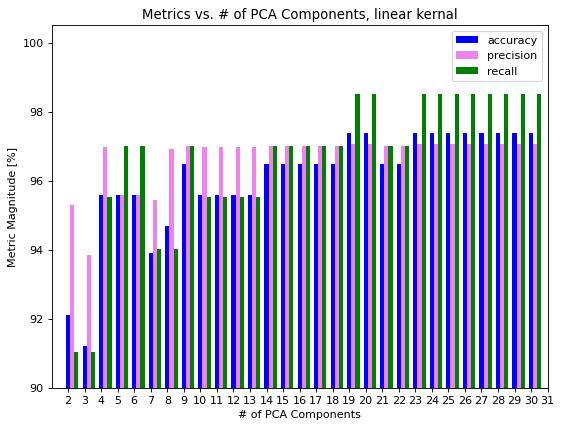

In [12]:
# This plots accuracy over multiple # of PCA component. It seems the minimum amount of PCA 
# components needed to obtain a good accuracy is 19. When a higher value of upperK is used
# the results do not get any better.

yes = np.arange(upperK)
for i in range(len(yes)):
    yes[i] = yes[i] + 2

strings = []
for i in range(upperK):
    new = str(i+2)
    strings.append(new)
         
figure(figsize=(8, 6), dpi=80)

width = 0.25 
plt.bar(yes, accuracy, color='blue', tick_label=strings, width=0.25, label = "accuracy")
plt.bar(yes+width, precision, color='violet',width=0.25, label = "precision")
plt.bar(yes+2*width, recall, color='green',width=0.25, label = "recall")

plt.xlabel("# of PCA Components")
plt.ylabel("Metric Magnitude [%]")
plt.title("Metrics vs. # of PCA Components, linear kernal")
plt.axis([1, upperK+1, 90, maximum+2])
plt.legend(loc='best')
plt.show()

In [13]:
accuracy = np.zeros(upperK)
precision = np.zeros(upperK)
recall = np.zeros(upperK)

# PCA feature extraction algorithm. Also runs SVM and computes evaluation metrics
for h in range(2,upperK+1):
    h_range = list(range(0,h))
    K1 = pca_iterations(h,x,y)
    
    X = K1.loc[:, h_range].values 
    Y = K1.loc[:, ['targets']].values
    Y_array = Y.reshape(569,)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size = 0.20, random_state = 0)
        
    # Create a svm Classifier
    clf = svm.SVC(kernel='poly',degree=3) # polynomial kernel
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 

    # Calculate accuracy, precision, and recall for each iteration
    accuracy[h-2] = round(metrics.accuracy_score(Y_test, Y_pred)*100,1)
    precision[h-2] = round(metrics.precision_score(Y_test, Y_pred)*100,2)
    recall[h-2] = round(metrics.recall_score(Y_test, Y_pred)*100,2)
    
maximum = np.max(recall)

# Show the evaluation mertic arrays as well as # of PCA components where each metric reaches its first maximum 
print("Accuracy Length:",len(accuracy),",",accuracy)
max_accur = np.max(accuracy)
max_accur_index = accuracy.argmax() + 2
print("Maximum accuracy:", max_accur, "using", max_accur_index, "components")

print(" ")
print("Precision Length:",len(precision),",",precision)
max_prec = np.max(precision)
max_prec_index = precision.argmax() + 2
print("Maximum precision:", max_prec, "using", max_prec_index, "components")


print(" ")
print("Recall Length:",len(recall),",",recall)
max_recall = np.max(recall)
max_recall_index = recall.argmax() + 2
print("Maximum recall:", max_recall, "using", max_recall_index, "components")

Accuracy Length: 30 , [89.5 89.5 90.4 90.4 89.5 89.5 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4
 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4 90.4
 90.4  0. ]
Maximum accuracy: 90.4 using 4 components
 
Precision Length: 30 , [85.71 84.81 85.9  85.9  84.81 84.81 85.9  85.9  85.9  85.9  85.9  85.9
 85.9  85.9  85.9  85.9  85.9  85.9  85.9  85.9  85.9  85.9  85.9  85.9
 85.9  85.9  85.9  85.9  85.9   0.  ]
Maximum precision: 85.9 using 4 components
 
Recall Length: 30 , [ 98.51 100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.     0.  ]
Maximum recall: 100.0 using 3 components


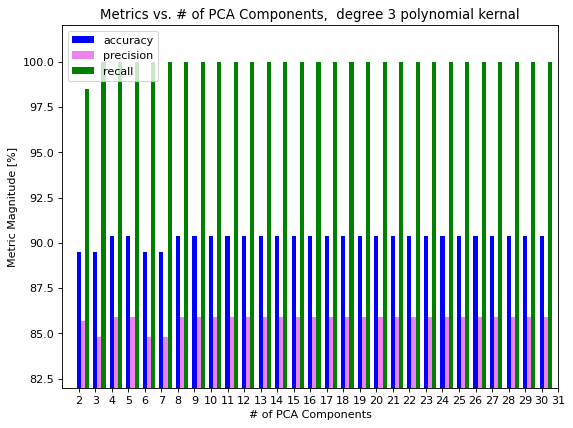

In [14]:
yes = np.arange(upperK)
for i in range(len(yes)):
    yes[i] = yes[i] + 2

strings = []
for i in range(upperK):
    new = str(i+2)
    strings.append(new)
         
figure(figsize=(8, 6), dpi=80)

width = 0.25 
plt.bar(yes, accuracy, color='blue', tick_label=strings, width=0.25, label = "accuracy")
plt.bar(yes+width, precision, color='violet',width=0.25, label = "precision")
plt.bar(yes+2*width, recall, color='green',width=0.25, label = "recall")

plt.xlabel("# of PCA Components")
plt.ylabel("Metric Magnitude [%]")
plt.title("Metrics vs. # of PCA Components,  degree 3 polynomial kernal")
plt.axis([1, upperK+1, 82, maximum+2])
plt.legend(loc='best')
plt.show()

In [15]:
accuracy = np.zeros(upperK)
precision = np.zeros(upperK)
recall = np.zeros(upperK)

# PCA feature extraction algorithm. Also runs SVM and computes evaluation metrics
for h in range(2,upperK+1):
    h_range = list(range(0,h))
    K1 = pca_iterations(h,x,y)
    
    X = K1.loc[:, h_range].values 
    Y = K1.loc[:, ['targets']].values
    Y_array = Y.reshape(569,)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size = 0.20, random_state = 0)
        
    # Create a svm Classifier
    clf = svm.SVC(kernel='rbf') # rbf kernel
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 

    # Calculate accuracy, precision, and recall for each iteration
    accuracy[h-2] = round(metrics.accuracy_score(Y_test, Y_pred)*100,1)
    precision[h-2] = round(metrics.precision_score(Y_test, Y_pred)*100,2)
    recall[h-2] = round(metrics.recall_score(Y_test, Y_pred)*100,2)
    
maximum = np.max(recall)

# Show the evaluation mertic arrays as well as # of PCA components where each metric reaches its first maximum 
print("Accuracy Length:",len(accuracy),",",accuracy)
max_accur = np.max(accuracy)
max_accur_index = accuracy.argmax() + 2
print("Maximum accuracy:", max_accur, "using", max_accur_index, "components")

print(" ")
print("Precision Length:",len(precision),",",precision)
max_prec = np.max(precision)
max_prec_index = precision.argmax() + 2
print("Maximum precision:", max_prec, "using", max_prec_index, "components")


print(" ")
print("Recall Length:",len(recall),",",recall)
max_recall = np.max(recall)
max_recall_index = recall.argmax() + 2
print("Maximum recall:", max_recall, "using", max_recall_index, "components")

Accuracy Length: 30 , [89.5 91.2 93.  95.6 95.6 96.5 98.2 97.4 97.4 96.5 97.4 98.2 97.4 98.2
 98.2 97.4 97.4 97.4 97.4 97.4 97.4 97.4 97.4 97.4 97.4 97.4 97.4 97.4
 97.4  0. ]
Maximum accuracy: 98.2 using 8 components
 
Precision Length: 30 , [92.31 92.54 92.75 95.59 95.59 97.01 98.51 97.06 97.06 97.01 97.06 98.51
 97.06 98.51 98.51 97.06 97.06 97.06 97.06 97.06 97.06 97.06 97.06 97.06
 97.06 97.06 97.06 97.06 97.06  0.  ]
Maximum precision: 98.51 using 8 components
 
Recall Length: 30 , [89.55 92.54 95.52 97.01 97.01 97.01 98.51 98.51 98.51 97.01 98.51 98.51
 98.51 98.51 98.51 98.51 98.51 98.51 98.51 98.51 98.51 98.51 98.51 98.51
 98.51 98.51 98.51 98.51 98.51  0.  ]
Maximum recall: 98.51 using 8 components


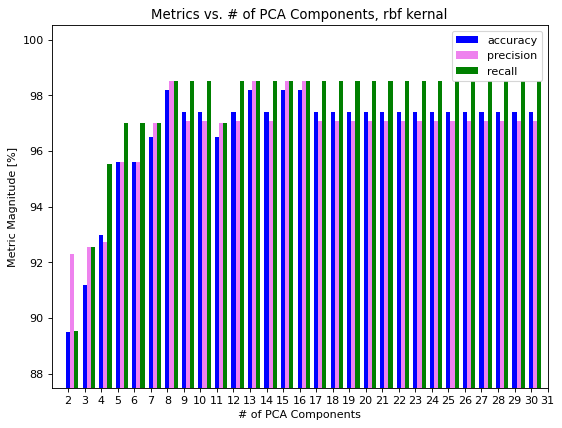

In [16]:
yes = np.arange(upperK)
for i in range(len(yes)):
    yes[i] = yes[i] + 2

strings = []
for i in range(upperK):
    new = str(i+2)
    strings.append(new)
         
figure(figsize=(8, 6), dpi=80)

width = 0.25 
plt.bar(yes, accuracy, color='blue', tick_label=strings, width=0.25, label = "accuracy")
plt.bar(yes+width, precision, color='violet',width=0.25, label = "precision")
plt.bar(yes+2*width, recall, color='green',width=0.25, label = "recall")

plt.xlabel("# of PCA Components")
plt.ylabel("Metric Magnitude [%]")
plt.title("Metrics vs. # of PCA Components, rbf kernal")
plt.axis([1, upperK+1, 87.5, maximum+2])
plt.legend(loc='best')
plt.show()

In [17]:
# Explore different kernel tricks to capture non-linearities within your data.  
# Plot the results and compare the accuracies for different kernels.

In [18]:
# Compare your results against the logistic regression that you have done in homework 3.

In [19]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 2  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [20]:
from sklearn.svm import SVR

In [21]:
def data_organize(data,length,scaling,problem): # Organize data into matrix for use with SVR algorithm
    
    # Create a list full of zeros with length of # of columns in dataset
    cols = len(data.columns)
    C = [0]*cols
    
    for i in range(len(C)):
        B = data.values[:, i]
        X = B.reshape(length, 1)
        C[i] = X
    
    # if scaling is activated, scales price, specific to dataset in 1a)
    end = int(len(C) - 1)
    if scaling == 1:
        C[0]=C[0]*10**(-3) 
        Y = data.values[:, end]*10**(-6)
    else:
        Y = data.values[:, end]

    initial = np.ones((length, 1)) # Create a 99x1 array of ones
    
    # PROBLEM IS HERE WITH .hstack(), can .hstack() be dynamic?
    if problem == 0:
        X_tot = np.hstack((C[0],C[1],C[2],C[3],C[4]))
    else:
        X_tot = np.hstack((C[0],C[1],C[2],C[3],C[4],C[5],C[6],C[7],C[8],C[9]))

      
    return X_tot, Y

In [22]:
# This section is for Support Vector Regression (SVR) model to predict housing prices that were seen in HW1

# Import housing list 
housing = pd.read_csv('Housing.csv')
print(housing.shape)

# Variables 1
varlist1 = ['area','bedrooms','bathrooms','stories','parking','price']

# Variables 2
varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']

housing.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
# This shows data set metrics
# housing.describe()

In [24]:
# Make all yes/no answers into binary

binary_varlist = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning','prefarea']

#varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning',
# Defining the map function
         
def binary_map(x):
         return x.map({'yes':1,"no":0})
         
# Applying the function to the housing list
housing[binary_varlist]=housing[binary_varlist].apply(binary_map)

# Check the housing dataframe now
# housing.head()

In [25]:
B = housing.values[:, 0] # Price values

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into two sets specified in train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, test_size = 0.3, train_size = 0.7, random_state = 1 )

# Get the lengths of the training and test set
mTrain = len(df_train)
mTest = len(df_test)

print('Dimensions of df_train:',df_train.shape)
print('Dimensions of df_train:',df_test.shape)

Dimensions of df_train: (381, 13)
Dimensions of df_train: (164, 13)


In [27]:
df_NewtrainA = df_train[varlist1]
df_NewtestA = df_test[varlist1]

df_NewtrainB = df_train[varlist2]
df_NewtestB = df_test[varlist2]

print('Dimensions of training set used in 1a:', df_NewtrainA.shape)
print('Dimensions of training set used in 1b:', df_NewtrainB.shape)
#print(df_NewtrainA[: 5])
print(df_NewtrainB[: 3])

Dimensions of training set used in 1a: (381, 6)
Dimensions of training set used in 1b: (381, 12)
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
180  4500         4          2        1         0          0         1   
189  3540         2          1        1         0          1         1   
93   7200         3          2        1         1          0         1   

     hotwaterheating  airconditioning  parking  prefarea    price  
180                0                1        2         0  5215000  
189                0                0        0         0  5040000  
93                 0                1        3         0  6300000  


In [28]:
y = df_train.values[:, 0]
print(y.shape)

(381,)


In [29]:
xTrainA, yTrainA = data_organize(df_NewtrainA,mTrain,1,0)
xTestA, yTestA = data_organize(df_NewtestA,mTest,1,0)

mTrainB = len(df_NewtrainB)
mTestB = len(df_NewtestB)

xTrainB, yTrainB = data_organize(df_NewtrainB,mTrainB,1,1)
xTestB, yTestB = data_organize(df_NewtrainB,mTrain,1,1)

In [30]:
# Put the training and test data into appropriate variables X and y in this block

In [31]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(xTrainA,yTrainA).predict(xTrainA)
# y_lin = svr_lin.fit(X, y).predict(X)
# y_poly = svr_poly.fit(X, y).predict(X)

In [32]:
# These are the predictions from the SVR. From here I am not sure what to do
print(y_rbf[: 5])

[5.25667881 3.23981373 6.19946797 3.60463012 6.51537502]
